# Plotting activity on the brain
This is a quick demo of a function to plot electrode activity on the brain.

In [ ]:
# To make sure moviepy loads
from imageio.plugins import ffmpeg
ffmpeg.download()

# This is because I'm lazy and haven't made a pip package yet...
import sys
sys.path.append('../../')

# Now regular imports
import ecogtools as et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
%matplotlib inline

In [10]:
melec = pd.read_csv('./data/2d_brain/meta_elec.csv')
im = plt.imread('./data/2d_brain/brain.png')
x, y = melec[['x_2d', 'y_2d']].values.T

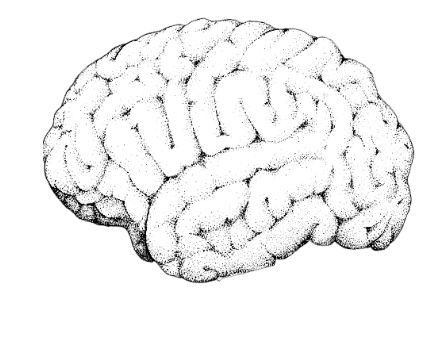

In [3]:
fig, ax = plt.subplots()
ax.imshow(im)
ax.set_axis_off()

**First simulate some activity**

In [78]:
sfreq_activity = 100
duration = 5
activity = np.random.randn(melec.shape[0], sfreq_activity * duration)
time = np.arange(activity.shape[-1]) / float(sfreq_activity)

# Add a random burst of activity
ix_activity = int(sfreq_activity * 2.5)
dur_activity = .5
activity[:, ix_activity:ix_activity + int(dur_activity * sfreq_activity)] = 3
activity = mne.filter.filter_data(activity, sfreq_activity, None, 5)

(32, 500)


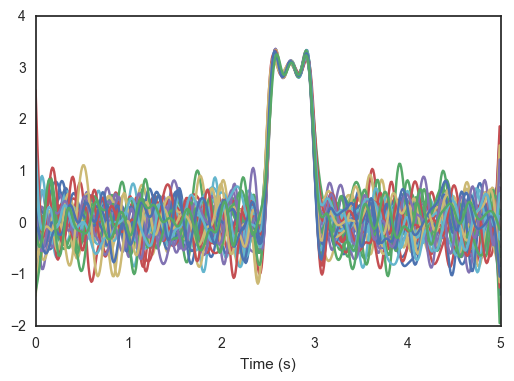

In [79]:
# Activity is of shape (n_channels, n_times)
print(activity.shape)

# Here's what the activity looks like over time
fig, ax = plt.subplots()
_ = ax.plot(time, activity.T)
_ = ax.set(xlabel='Time (s)')

**We can display a single frame of activity like this**

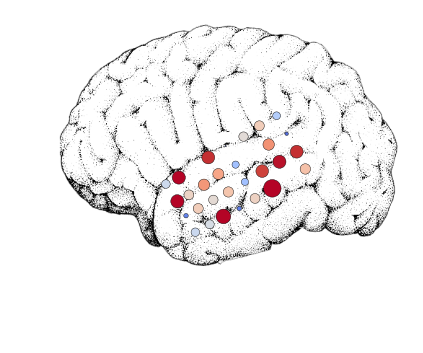

In [83]:
et.plot_activity_on_brain(x, y, activity[:, 0], im,
                          smin=10, smax=100, vmin=-1, vmax=1)

**Alternatively, we can create a movie if we pass a 2-D array as `activity`**

<moviepy.video.VideoClip.VideoClip instance at 0x1392927e8>

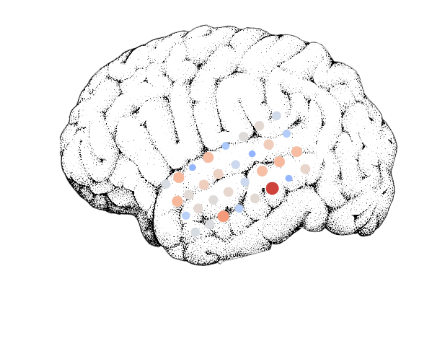

In [84]:
clip = et.plot_activity_on_brain(x, y, activity, im,
                                 smax=100, vmin=-3, vmax=3)
# This is now a moviepy video clip
clip

In [85]:
clip.ipython_display()

100%|█████████▉| 500/501 [00:07<00:00, 65.13it/s]     | 2/501 [00:00<00:29, 16.97it/s]
